###  Corona vaccine progress 
version 0.6

* [this Notebook](https://github.com/salgo60/CoronaVaccinationCheck/blob/master/Check%20Corona%20Vaccination.ipynb) / [repository](https://github.com/salgo60/CoronaVaccinationCheck) 

* read the data from [github.com/owid/covid-19-data...vaccinations/country_data](https://github.com/owid/covid-19-data/tree/master/public/data/vaccinations/country_data) and Wikidata
  * Data is reported cummulated for United Kingdom but also subnational data England, Scotland, Northern Ireland, Wales see [issue 228](https://github.com/owid/covid-19-data/issues/228)
     * subnational data have been published quite irregularly so far ==> we filter them out

In [1]:
from datetime import datetime
start_time  = datetime.now()
print("Last run: ", start_time)

Last run:  2020-12-28 15:47:45.005690


In [2]:
import pandas as pd
GITHUB_directory = "https://api.github.com/repos/owid/covid-19-data/contents/public/data/vaccinations/country_data"  
countries = pd.read_json(GITHUB_directory)  
listcountries = []
for index,row in countries.iterrows():
    df = pd.read_csv(row["download_url"])
    listcountries.append(df)
    
allCountries = pd.concat(listcountries, axis=0, ignore_index=True)    

In [3]:
# Show 15 latest sorted by dates
allCountries.sort_values(by=['date'],ascending=False)[0:15]

,location,date,vaccine,total_vaccinations,source_url
26,Germany,2020-12-27,Pfizer/BioNTech,18454,https://www.rki.de/DE/Content/InfAZ/N/Neuartig...
21,Chile,2020-12-27,Pfizer/BioNTech,8638,https://deis.minsal.cl/
4,Bahrain,2020-12-27,Sinopharm,53614,https://twitter.com/MOH_Bahrain/status/1343274...
36,Mexico,2020-12-27,Pfizer/BioNTech,6824,https://www.gob.mx/salud/prensa/269-continua-j...
17,Canada,2020-12-27,Pfizer/BioNTech,52179,https://github.com/ishaberry/Covid19Canada/blo...
34,Israel,2020-12-27,Pfizer/BioNTech,378200,https://www.gov.il/he/departments/news/2812202...
24,Denmark,2020-12-27,Pfizer/BioNTech,4788,https://files.ssi.dk/covid19/vaccinationstilsl...
16,Canada,2020-12-26,Pfizer/BioNTech,48582,https://github.com/ishaberry/Covid19Canada/blo...
3,Bahrain,2020-12-26,Sinopharm,51556,https://twitter.com/MOH_Bahrain/status/1342912...
49,United States,2020-12-26,"Moderna, Pfizer/BioNTech",1944585,https://covid.cdc.gov/covid-data-tracker/#vacc...


In [4]:
#Countries in list
allCountries["location"].value_counts()

Canada              13
Israel               8
United States        5
Bahrain              5
Chile                4
Russia               2
Scotland             2
Mexico               2
United Kingdom       2
Northern Ireland     2
Wales                2
England              1
Germany              1
Costa Rica           1
China                1
Denmark              1
Name: location, dtype: int64

In [5]:
allCountries.groupby(["location", "vaccine"]).size()

location          vaccine                 
Bahrain           Sinopharm                    5
Canada            Pfizer/BioNTech             13
Chile             Pfizer/BioNTech              4
China             CNBG, Sinovac                1
Costa Rica        Pfizer/BioNTech              1
Denmark           Pfizer/BioNTech              1
England           Pfizer/BioNTech              1
Germany           Pfizer/BioNTech              1
Israel            Pfizer/BioNTech              8
Mexico            Pfizer/BioNTech              2
Northern Ireland  Pfizer/BioNTech              2
Russia            Sputnik V                    2
Scotland          Pfizer/BioNTech              2
United Kingdom    Pfizer/BioNTech              2
United States     Moderna, Pfizer/BioNTech     2
                  Pfizer/BioNTech              3
Wales             Pfizer/BioNTech              2
dtype: int64

In [6]:
allCountries['date'] = allCountries['date'].astype('datetime64[ns]')   

# Filter away Wales , England, Scotland see above and [issue 228](https://github.com/owid/covid-19-data/issues/228)
list_of_countries_to_delete = ["England","Northern Ireland","Scotland","Wales"]

allCountriesFiltered = allCountries[~allCountries["location"].isin(list_of_countries_to_delete)]
allCountriesFiltered.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 0 to 49
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   location            45 non-null     object        
 1   date                45 non-null     datetime64[ns]
 2   vaccine             45 non-null     object        
 3   total_vaccinations  45 non-null     int64         
 4   source_url          45 non-null     object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 2.1+ KB


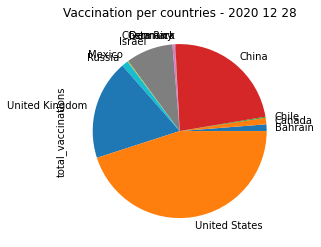

In [7]:
#Countries
%matplotlib inline    
import matplotlib.pyplot as plt   

#Reported numbers are accumulated --> get latest
plotCountries = allCountriesFiltered.sort_values(by=['date'],ascending=False) \
    [['total_vaccinations','location','vaccine']].groupby('location').apply(lambda x: x.head(1))
plotCountries = plotCountries.set_index('location')
plotCountries["total_vaccinations"].plot( y='location',kind = 'pie') 
plt.title("Vaccination per countries - " + start_time.strftime('%Y %m %d'))
plt.savefig('Corona_VaccinationperCountry.png')  
plt.show() 


In [8]:
plotCountries.sort_values(by='total_vaccinations',ascending=True)

,total_vaccinations,vaccine
location,,
Costa Rica,55,Pfizer/BioNTech
Denmark,4788,Pfizer/BioNTech
Mexico,6824,Pfizer/BioNTech
Chile,8638,Pfizer/BioNTech
Germany,18454,Pfizer/BioNTech
Russia,52000,Sputnik V
Canada,52179,Pfizer/BioNTech
Bahrain,53614,Sinopharm
Israel,378200,Pfizer/BioNTech


In [9]:
plotCountries.sum()

total_vaccinations                                              4319337
vaccine               SinopharmPfizer/BioNTechPfizer/BioNTechCNBG, S...
dtype: object

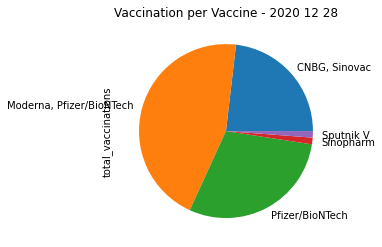

In [10]:
# Vaccine numbers
plotVaccine = plotCountries.groupby('vaccine')['total_vaccinations'].sum()
plotVaccine.plot( kind = 'pie') 
plt.title("Vaccination per Vaccine - " + start_time.strftime('%Y %m %d'))
plt.savefig('Corona_VaccinationperVaccine.png')  
plt.show()

In [11]:
plotVaccine.sort_values(ascending=True)

vaccine
Sputnik V                     52000
Sinopharm                     53614
CNBG, Sinovac               1000000
Pfizer/BioNTech             1269138
Moderna, Pfizer/BioNTech    1944585
Name: total_vaccinations, dtype: int64

In [12]:
# Sweden have 10 000 doses....
allCountries

,location,date,vaccine,total_vaccinations,source_url
0,Bahrain,2020-12-23,Sinopharm,38965,https://twitter.com/MOH_Bahrain/status/1341855...
1,Bahrain,2020-12-24,Sinopharm,50071,https://twitter.com/MOH_Bahrain/status/1342189...
2,Bahrain,2020-12-25,Sinopharm,50543,https://twitter.com/MOH_Bahrain/status/1342560...
3,Bahrain,2020-12-26,Sinopharm,51556,https://twitter.com/MOH_Bahrain/status/1342912...
4,Bahrain,2020-12-27,Sinopharm,53614,https://twitter.com/MOH_Bahrain/status/1343274...
5,Canada,2020-12-14,Pfizer/BioNTech,297,https://github.com/ishaberry/Covid19Canada/blo...
6,Canada,2020-12-15,Pfizer/BioNTech,1163,https://github.com/ishaberry/Covid19Canada/blo...
7,Canada,2020-12-16,Pfizer/BioNTech,3683,https://github.com/ishaberry/Covid19Canada/blo...
8,Canada,2020-12-17,Pfizer/BioNTech,7201,https://github.com/ishaberry/Covid19Canada/blo...
9,Canada,2020-12-18,Pfizer/BioNTech,11174,https://github.com/ishaberry/Covid19Canada/blo...


In [13]:
end = datetime.now()
print("Ended: ", end) 
print('Time elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - start_time))

Ended:  2020-12-28 15:47:50.336957
Time elapsed (hh:mm:ss.ms) 0:00:05.331474


### Whole dataset
see 
* [COVID-19 Data Processing Pipelines and datasets](https://github.com/covid19-data/covid19-data)

### Compare population
* using data from Wikidata
* "translates" the labels to Wikidata Qnumber see reconciliationCountries_dict 

In [14]:
reconciliationCountries_dict = {
    "Bahrain" : "Q398", "Belarus" : "Q184","Canada" : "Q16",    "China" : "Q148",
    "Chile" : "Q298", "Costa Rica" : "Q800", "Denmark": "Q35",
    "Israel" : "Q801", "Mexico" : "Q96",
    "France" : "Q142","Germany" : "Q183",
    "Russia" : "Q159","United Kingdom" : "Q145", "United States" : "Q30",
    "Hungary": "Q28"}
reconciliationCountries = pd.DataFrame.from_dict([reconciliationCountries_dict]).T
reconciliationCountries.columns = ["WD"]
reconciliationCountries.index.name = "Country"

In [15]:
import sys,json
from SPARQLWrapper import SPARQLWrapper, JSON

endpoint_url = "https://query.wikidata.org/sparql"
 
# https://w.wiki/sFn
queryWD = """SELECT DISTINCT ?cid  (SAMPLE(?continent) AS ?continent)  (SAMPLE(?memberEU) AS ?memberEU)  (SAMPLE(?democracy) AS ?democracy) ?country 
(REPLACE(STR(?cid), ".*Q", "Q") AS ?qid) ?population ?ISO3166_1 ?nominalGDPperCapita ?PPP_GDP_per_capita ?Human_Development_Index 
?G8 ?G20 ?IMF WHERE {
  ?cid wdt:P31 wd:Q3624078;
    wdt:P1082 ?population.
  OPTIONAL { ?cid wdt:P298 ?ISO3166_1. }
  OPTIONAL { ?cid wdt:P2132 ?nominalGDPperCapita. }
  OPTIONAL { ?cid wdt:P2299 ?PPP_GDP_per_capita. }
  OPTIONAL { ?cid wdt:P1081 ?Human_Development_Index. }
  BIND (exists{?cid wdt:P463 wd:Q458} AS ?memberEU)
  BIND (exists{?cid wdt:P463 wd:Q37143} AS ?G8)
  BIND (exists{?cid wdt:P463 wd:Q19771} AS ?G20)
  BIND (exists{?cid wdt:P463 wd:Q19771} AS ?IMF)
  BIND (exists{?cid wdt:P122/wdt:P279* wd:Q7174} AS ?democracy)
  {?cid wdt:P30 ?contid}
  OPTIONAL {
    ?contid rdfs:label ?continent.
    FILTER((LANG(?continent)) = "en")
    ?cid rdfs:label ?country.
    FILTER((LANG(?country)) = "en")
  }

SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
}
GROUP BY ?population ?countryLabel ?country ?ISO3166_1 ?nominalGDPperCapita ?PPP_GDP_per_capita ?Human_Development_Index ?cid  
?G8 ?G20 ?IMF"""


def get_sparql_dataframe(endpoint_url, query):
    """
    Helper function to convert SPARQL results into a Pandas data frame.
    """
    user_agent = "salgo60/%s.%s" % (sys.version_info[0], sys.version_info[1])
 
    sparql = SPARQLWrapper(endpoint_url, agent=user_agent)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    result = sparql.query()

    processed_results = json.load(result.response)
    cols = processed_results['head']['vars']

    out = []
    for row in processed_results['results']['bindings']:
        item = []
        for c in cols:
            item.append(row.get(c, {}).get('value'))
        out.append(item)

    return pd.DataFrame(out, columns=cols)

WDpopulation = get_sparql_dataframe(endpoint_url, queryWD)
WDpopulation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   cid                      195 non-null    object
 1   continent                195 non-null    object
 2   memberEU                 195 non-null    object
 3   democracy                195 non-null    object
 4   country                  195 non-null    object
 5   qid                      195 non-null    object
 6   population               195 non-null    object
 7   ISO3166_1                195 non-null    object
 8   nominalGDPperCapita      191 non-null    object
 9   PPP_GDP_per_capita       185 non-null    object
 10  Human_Development_Index  186 non-null    object
 11  G8                       195 non-null    object
 12  G20                      195 non-null    object
 13  IMF                      195 non-null    object
dtypes: object(14)
memory usage: 21.5+ KB


In [16]:
WDpopulation.sample(5)

,cid,continent,memberEU,democracy,country,qid,population,ISO3166_1,nominalGDPperCapita,PPP_GDP_per_capita,Human_Development_Index,G8,G20,IMF
74,http://www.wikidata.org/entity/Q399,Europe,false,true,Armenia,Q399,2930450,ARM,3936,9667.959,0.743,false,false,false
87,http://www.wikidata.org/entity/Q928,Asia,false,true,Philippines,Q928,100981437,PHL,2988,8360.509,0.699,false,false,false
109,http://www.wikidata.org/entity/Q843,Asia,false,true,Pakistan,Q843,216565318,PAK,1547,5539.107,0.562,false,false,false
28,http://www.wikidata.org/entity/Q30,Oceania,false,true,United States of America,Q30,328239523,USA,59927,59927.93,0.92,true,true,true
18,http://www.wikidata.org/entity/Q678,Oceania,false,false,Tonga,Q678,108020,TON,3959,5969.184,0.726,false,false,false


In [17]:
plotCountries

,total_vaccinations,vaccine
location,,
Bahrain,53614,Sinopharm
Canada,52179,Pfizer/BioNTech
Chile,8638,Pfizer/BioNTech
China,1000000,"CNBG, Sinovac"
Costa Rica,55,Pfizer/BioNTech
Denmark,4788,Pfizer/BioNTech
Germany,18454,Pfizer/BioNTech
Israel,378200,Pfizer/BioNTech
Mexico,6824,Pfizer/BioNTech


In [18]:
plotCountriesPopulation = pd.merge(plotCountries, reconciliationCountries,how='outer', left_index=True, right_index=True,indicator=True)   
plotCountriesPopulation

,total_vaccinations,vaccine,WD,_merge
Bahrain,53614.0,Sinopharm,Q398,both
Belarus,NaN,NaN,Q184,right_only
Canada,52179.0,Pfizer/BioNTech,Q16,both
Chile,8638.0,Pfizer/BioNTech,Q298,both
China,1000000.0,"CNBG, Sinovac",Q148,both
Costa Rica,55.0,Pfizer/BioNTech,Q800,both
Denmark,4788.0,Pfizer/BioNTech,Q35,both
France,NaN,NaN,Q142,right_only
Germany,18454.0,Pfizer/BioNTech,Q183,both
Hungary,NaN,NaN,Q28,right_only


## New countries

In [19]:
#Missing
WDmissing = plotCountriesPopulation[plotCountriesPopulation["_merge"] == "left_only"].copy()
WDmissing

,total_vaccinations,vaccine,WD,_merge


In [20]:
del plotCountriesPopulation['_merge']


In [21]:
plotCountriesPopulation = pd.merge(plotCountries, reconciliationCountries,how='inner', left_index=True, right_index=True)  
#WDpopulation.sample(5)

In [22]:
CountriesData = pd.merge(plotCountriesPopulation, WDpopulation,how='inner', left_on='WD', right_on='qid',indicator=True)   
CountriesData = CountriesData.set_index('country')
CountriesData


,total_vaccinations,vaccine,WD,cid,continent,memberEU,democracy,qid,population,ISO3166_1,nominalGDPperCapita,PPP_GDP_per_capita,Human_Development_Index,G8,G20,IMF,_merge
country,,,,,,,,,,,,,,,,,
Bahrain,53614,Sinopharm,Q398,http://www.wikidata.org/entity/Q398,Asia,false,false,Q398,1492584,BHR,23739,47708.055,0.824,false,false,false,both
Canada,52179,Pfizer/BioNTech,Q16,http://www.wikidata.org/entity/Q16,North America,false,false,Q16,37894799,CAN,44870,46509.717,0.926,true,true,true,both
Chile,8638,Pfizer/BioNTech,Q298,http://www.wikidata.org/entity/Q298,South America,false,true,Q298,18054726,CHL,15346,24747.307,0.832,false,false,false,both
People's Republic of China,1000000,"CNBG, Sinovac",Q148,http://www.wikidata.org/entity/Q148,Asia,false,true,Q148,1409517397,CHN,8826,16842.408,0.752,false,true,true,both
Costa Rica,55,Pfizer/BioNTech,Q800,http://www.wikidata.org/entity/Q800,North America,false,false,Q800,4905769,CRI,11677,17109.751,0.794,false,false,false,both
Denmark,4788,Pfizer/BioNTech,Q35,http://www.wikidata.org/entity/Q35,Europe,true,false,Q35,5827463,DNK,57218,54356.448,0.929,false,false,false,both
Germany,18454,Pfizer/BioNTech,Q183,http://www.wikidata.org/entity/Q183,Europe,true,true,Q183,83149300,DEU,44665,52555.933,0.926,true,true,true,both
Israel,378200,Pfizer/BioNTech,Q801,http://www.wikidata.org/entity/Q801,Asia,false,true,Q801,9093000,ISR,40543,38867.762,0.899,false,false,false,both
Mexico,6824,Pfizer/BioNTech,Q96,http://www.wikidata.org/entity/Q96,North America,false,true,Q96,130526945,MEX,8910,18655.922,0.756,false,true,true,both


In [23]:
#del CountriesData['country']
#del CountriesData['qid']
#del CountriesData['_merge']

CountriesData['population'] = CountriesData['population'].astype(int)
CountriesData['nominalGDPperCapita'] = CountriesData['nominalGDPperCapita'].astype(int)
CountriesData['PPP_GDP_per_capita'] = CountriesData['PPP_GDP_per_capita'].astype(float)
CountriesData['Human_Development_Index'] = CountriesData['Human_Development_Index'].astype(float)
CountriesData["memberEU"].replace({"true": "1", "false": "0"}, inplace=True)
CountriesData['memberEU'] = CountriesData['memberEU'].astype(int)
CountriesData["democracy"].replace({"true": "1", "false": "0"}, inplace=True)
CountriesData["democracy"] = CountriesData['democracy'].astype(int)
# G8 G20 IMF
CountriesData["G8"].replace({"true": "1", "false": "0"}, inplace=True)
CountriesData['G8'] = CountriesData['G8'].astype(int)
CountriesData["G20"].replace({"true": "1", "false": "0"}, inplace=True)
CountriesData['G20'] = CountriesData['G20'].astype(int)
CountriesData["IMF"].replace({"true": "1", "false": "0"}, inplace=True)
CountriesData['IMF'] = CountriesData['IMF'].astype(int)

#"Correct United States of America
CountriesData["continent"].replace({"Oceania": "North America"}, inplace=True)
CountriesData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, Bahrain to United States of America
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   total_vaccinations       12 non-null     int64   
 1   vaccine                  12 non-null     object  
 2   WD                       12 non-null     object  
 3   cid                      12 non-null     object  
 4   continent                12 non-null     object  
 5   memberEU                 12 non-null     int64   
 6   democracy                12 non-null     int64   
 7   qid                      12 non-null     object  
 8   population               12 non-null     int64   
 9   ISO3166_1                12 non-null     object  
 10  nominalGDPperCapita      12 non-null     int64   
 11  PPP_GDP_per_capita       12 non-null     float64 
 12  Human_Development_Index  12 non-null     float64 
 13  G8                       12 non-null     int

In [24]:
#CountriesData

In [25]:
CountriesData['Country'] = CountriesData.index

In [26]:
CountriesData["vaccinations_population_percent"] = CountriesData["total_vaccinations"]/CountriesData["population"] * 100

correlations = CountriesData.corr()  
correlations["total_vaccinations"]

total_vaccinations                 1.000000
memberEU                          -0.085334
democracy                          0.259698
population                         0.497017
nominalGDPperCapita                0.358716
PPP_GDP_per_capita                 0.291527
Human_Development_Index            0.176159
G8                                 0.311810
G20                                0.395622
IMF                                0.395622
vaccinations_population_percent    0.039261
Name: total_vaccinations, dtype: float64

In [27]:
correlations["vaccinations_population_percent"]

total_vaccinations                 0.039261
memberEU                          -0.160379
democracy                         -0.105103
population                        -0.222764
nominalGDPperCapita                0.151205
PPP_GDP_per_capita                 0.260465
Human_Development_Index            0.149737
G8                                -0.258059
G20                               -0.448147
IMF                               -0.448147
vaccinations_population_percent    1.000000
Name: vaccinations_population_percent, dtype: float64

In [28]:
# see https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e
import seaborn as sns
#plt.rcParams['figure.figsize'] = (8.0, 8.0)
#heatmap = sns.heatmap(correlations, vmin=-1, vmax=1, annot=True)
#heatmap.set_title('Corona vaccinations Correlation Heatmap', fontdict={'fontsize':12}, pad=12);


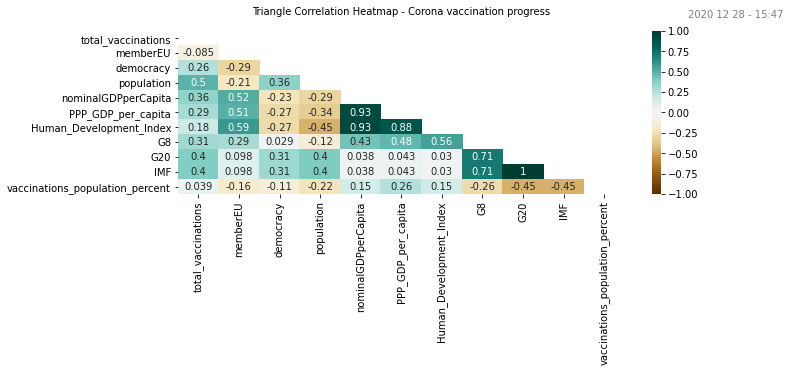

In [29]:
import numpy as np
plt.figure(figsize=(10, 3))
np.triu(np.ones_like(correlations))
mask = np.triu(np.ones_like(correlations, dtype=np.bool))
heatmap = sns.heatmap(correlations, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap - Corona vaccination progress', fontdict={'fontsize':10},y=0.9, pad=16);
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M'), fontsize=10,color = 'gray',x=0.9)
plt.savefig('Correlation_heatmap.png', dpi=300, bbox_inches='tight')

In [30]:
CountriesData = CountriesData.sort_values(by=['vaccinations_population_percent'],ascending=False)
CountriesData[{"total_vaccinations","population","vaccinations_population_percent","continent",
               "memberEU","G8","G20","IMF"}]

,memberEU,total_vaccinations,G20,continent,IMF,vaccinations_population_percent,population,G8
country,,,,,,,,
Israel,0,378200,0,Asia,0,4.159243,9093000,0
Bahrain,0,53614,0,Asia,0,3.592026,1492584,0
United Kingdom,1,800000,1,Europe,1,1.211712,66022273,1
United States of America,0,1944585,1,North America,1,0.592429,328239523,1
Canada,0,52179,1,North America,1,0.137694,37894799,1
Denmark,1,4788,0,Europe,0,0.082163,5827463,0
People's Republic of China,0,1000000,1,Asia,1,0.070946,1409517397,0
Chile,0,8638,0,South America,0,0.047843,18054726,0
Russia,0,52000,1,Europe,1,0.035421,146804372,1


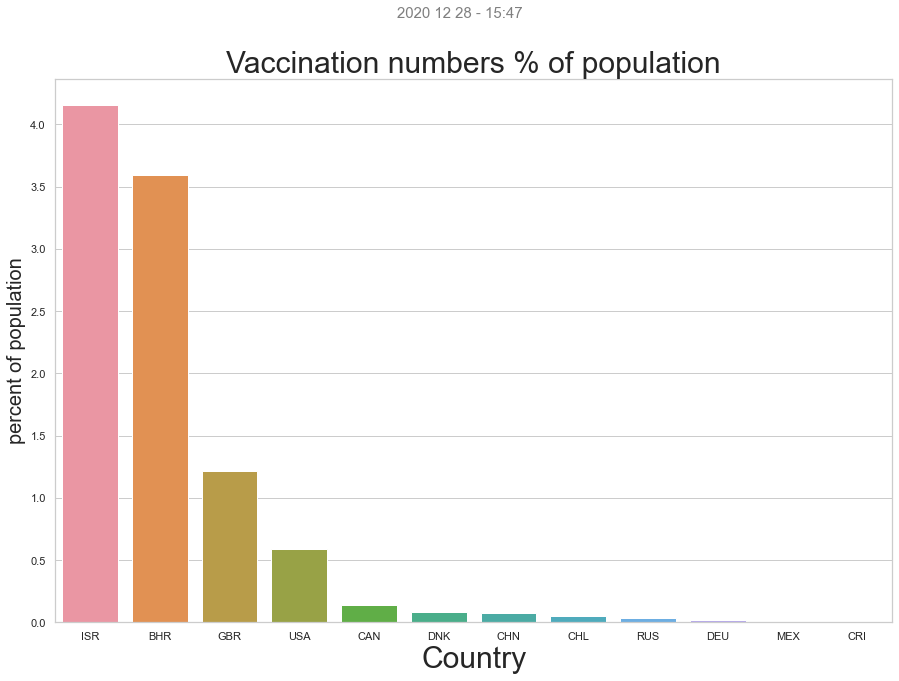

In [31]:
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "vaccinations_population_percent", data=CountriesData). \
            set_title("Vaccination numbers % of population", \
                      fontsize=30)
plt.ylabel("percent of population",fontsize=20)
plt.xlabel("Country",fontsize=30)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M'), fontsize=15,color = 'gray')
plt.savefig("Corona_VaccinationperCountryPopulation_sns_2.png",bbox_inches="tight")

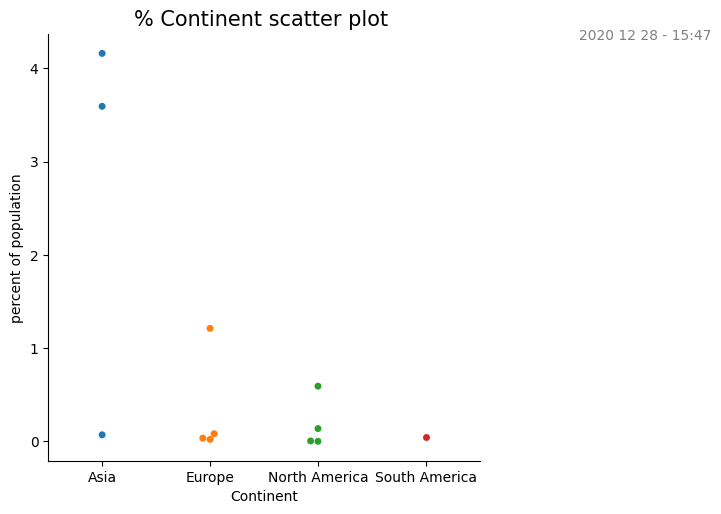

In [32]:
#https://seaborn.pydata.org/tutorial/categorical.html
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="continent", y="vaccinations_population_percent", data=CountriesData,kind="swarm",legend='brief')
plt.title("% Continent scatter plot " , fontsize=15, y=0.9 )
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("Continent",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M'), x=1.3, fontsize=10,color = 'gray')

plt.savefig("Corona_VaccinationperCountryPopulation_Categorical_scatterplot.png",bbox_inches="tight")


In [33]:
CountriesData["Member EU"] = CountriesData["memberEU"]
CountriesData["Member EU"] = CountriesData["Member EU"].astype(str)
CountriesData["Member EU"].replace({"1": "Member in EU", "0": "non Member"}, inplace=True)

#CountriesData

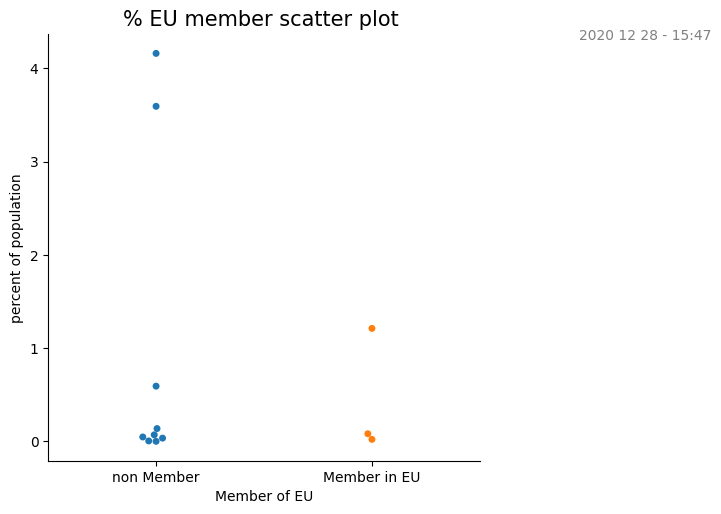

In [34]:

plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="Member EU", y="vaccinations_population_percent", data=CountriesData,kind="swarm",legend='brief')
plt.title("% EU member scatter plot " , fontsize=15, y=0.9 )
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("Member of EU",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M'), x=1.3, fontsize=10,color = 'gray')

plt.savefig("Corona_VaccinationperCountryPopulation_EUCategorical_scatterplot.png",bbox_inches="tight")


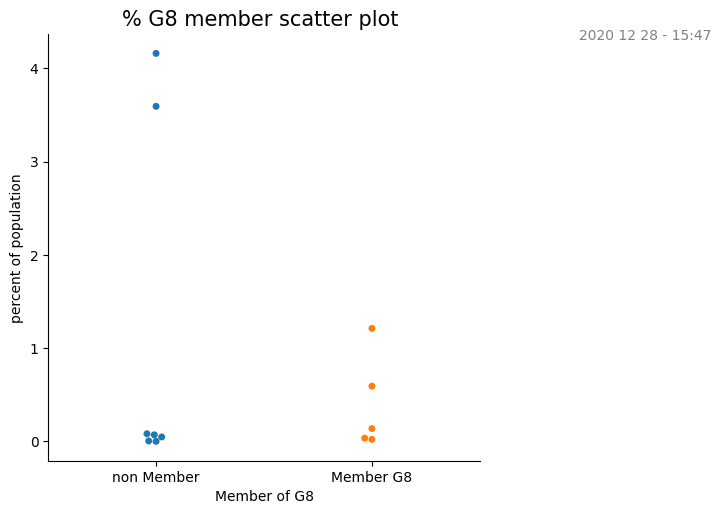

In [35]:
CountriesData["Member G8"] = CountriesData["G8"]
CountriesData["Member G8"] = CountriesData["G8"].astype(str)
CountriesData["Member G8"].replace({"1": "Member G8", "0": "non Member"}, inplace=True)
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="Member G8", y="vaccinations_population_percent", data=CountriesData,kind="swarm",legend='brief')
plt.title("% G8 member scatter plot " , fontsize=15, y=0.9 )
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("Member of G8",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M'), x=1.3, fontsize=10,color = 'gray')

plt.savefig("Corona_VaccinationperCountryPopulation_G8_Categorical_scatterplot.png",bbox_inches="tight")


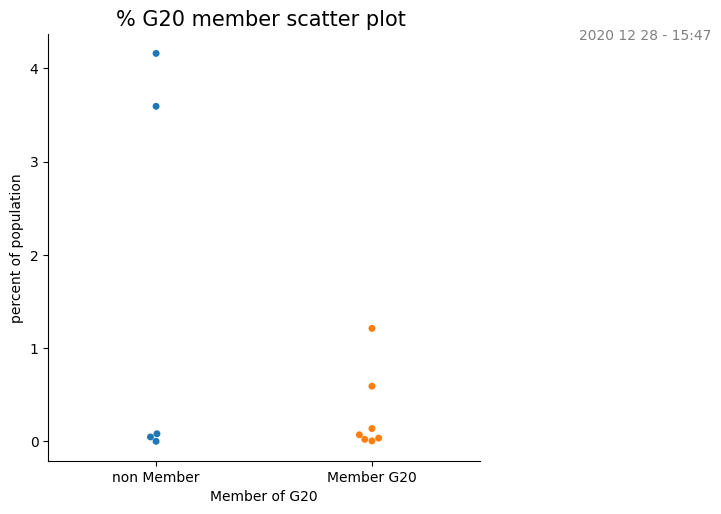

In [36]:
CountriesData["Member G20"] = CountriesData["G20"]
CountriesData["Member G20"] = CountriesData["G20"].astype(str)
CountriesData["Member G20"].replace({"1": "Member G20", "0": "non Member"}, inplace=True)
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="Member G20", y="vaccinations_population_percent", data=CountriesData,kind="swarm",legend='brief')
plt.title("% G20 member scatter plot " , fontsize=15, y=0.9 )
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("Member of G20",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M'), x=1.3, fontsize=10,color = 'gray')

plt.savefig("Corona_VaccinationperCountryPopulation_G20_Categorical_scatterplot.png",bbox_inches="tight")


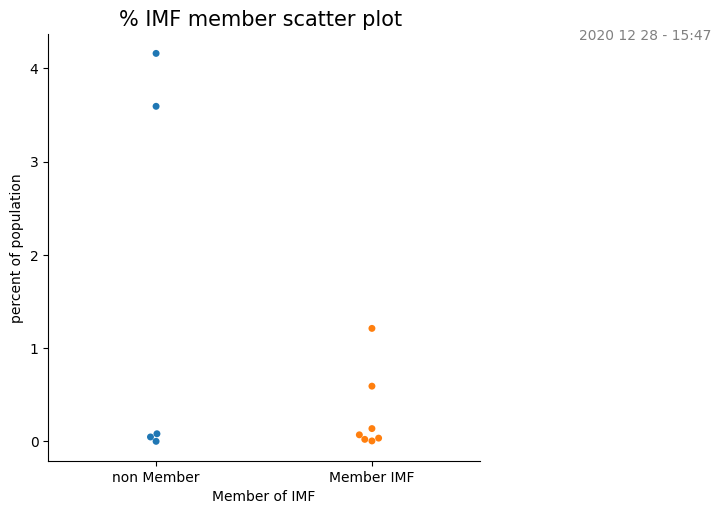

In [37]:
CountriesData["Member IMF"] = CountriesData["IMF"]
CountriesData["Member IMF"] = CountriesData["IMF"].astype(str)
CountriesData["Member IMF"].replace({"1": "Member IMF", "0": "non Member"}, inplace=True)
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="Member IMF", y="vaccinations_population_percent", data=CountriesData,kind="swarm",legend='brief')
plt.title("% IMF member scatter plot " , fontsize=15, y=0.9 )
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("Member of IMF",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M'),  x=1.3, fontsize=10,color = 'gray')

plt.savefig("Corona_VaccinationperCountryPopulation_IMF_Categorical_scatterplot.png",bbox_inches="tight")
